# kNN基础

In [1]:
from pylab import *

In [2]:
rx = [
    [3.39,2.33],
    [3.11,1.78],
    [1.34,3.36],
    [3.59,4.67],
    [2.28,2.86],
    [7.42,4.69],
    [5.74,3.53],
    [9.17,2.51],
    [7.79,3.42],
    [7.93,0.79]       
]
ry = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1 ]

In [3]:
X_train = np.array(rx)
y_train = np.array(ry)

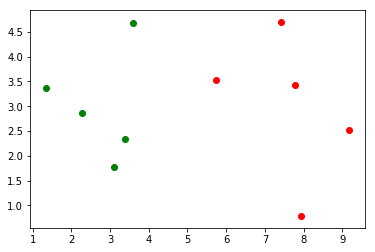

In [4]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='g')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='r')
plt.show()

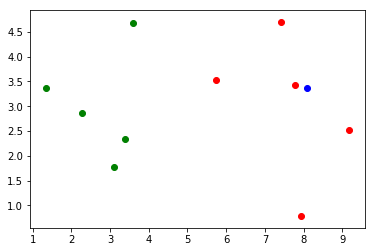

In [5]:
x=np.array([8.09,3.36])
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='g')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='r')
plt.scatter(x[0], x[1], color='b')
plt.show()

In [18]:
from math import sqrt
from collections import Counter

def kNN_classify(k, x_train, y_train, x):
    assert 1<= k <= x_train.shape[0], 'k must be valid'
    assert x_train.shape[0] == y_train.shape[0], "train's size must be equal to y'size"
    assert x_train.shape[1] == x.shape[0], 'the feature number of x must be right'
    
    distance = np.sqrt(np.sum((X_train-x)**2, axis=1))
    nearest = np.argsort(distance)
    
    topK_y = y_train[nearest[:k]]
    votes = Counter(topK_y)
    
    return votes.most_common(1)[0][0]
    

In [20]:
y_prediction = kNN_classify(6, X_train, y_train, x)

###  sklearn中的knn

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn_clf = KNeighborsClassifier(n_neighbors=6)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [24]:
y1_predict=knn_clf.predict([x])

In [25]:
y1_predict

array([1])

### 测试KNN


In [26]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [34]:
from sklearn.model_selection import train_test_split
x_train,  x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [35]:
x_train.shape

(120, 4)

In [36]:
y_train.shape

(120,)

In [37]:
knn_clf1 = KNeighborsClassifier(n_neighbors=6)
knn_clf1.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [38]:
knn_clf1.score(x_test, y_test)

0.96666666666666667

手写体识别

In [40]:
digits = datasets.load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [41]:
X = digits.data
y = digits.target

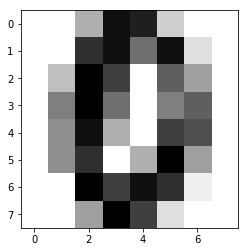

In [42]:
s = X[666]
sImage = s.reshape(8,8)
plt.imshow(sImage, cmap = matplotlib.cm.binary)
plt.show()

In [46]:
x_train,  x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=666)

In [47]:
knn_clf2 = KNeighborsClassifier(n_neighbors=3)
knn_clf2.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [48]:
knn_clf2.score(x_test, y_test)

0.98888888888888893

# 超参数

KNN中预先设定的K，在算法运行前需要设定的参数。  
要寻找好的超参数
- 领域知识相关
- 经验数值
- 实验搜索

寻找最好的k和weights（取值：uniform或者distance），p  


# 网格搜索GridSearch
1、定义搜索参数，
2，调用搜索函数

In [66]:
# 定义要搜索的网格参数集合
param_grid = [
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1,11)]
    },  # 第一组
    {
        'weights':['distance'],
        'n_neighbors': [i for i in range(1,11)],
        'p': [i for i in range(1,6)]
    }   # 第二组
]

In [67]:
knn_clf = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(knn_clf,param_grid,n_jobs=-1, verbose=2)

In [68]:
%%time 
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.3min


Wall time: 5min 16s


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  5.3min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [69]:
best_knn = grid_search.best_estimator_

In [70]:
grid_search.best_score_

0.98538622129436326

In [71]:
grid_search.best_params_

{'n_neighbors': 3, 'p': 3, 'weights': 'distance'}

In [72]:
best_knn.score(x_test, y_test)

0.98333333333333328

# 数据归一化
机器学习在进行时，  
第一步预处理就是数据归一化
- 最值归一化   ： 数据有边界，如课程分数   -> minMaxScalar
- 均值方差归一化： 数据无边界，比如收入；一般都用均值方差归一化 -> StdScalar



#  kNN算法的问题
优点：  
- 天然多分类
- 可以用于回归，因为可以计算距离
  
缺点：  
- 计算量太大,效率低; 因为计算时，需要和保存的所有样本m的所有特征n进行计算，所以复杂度：$ \Theta(mn) $
- 高度数据敏感
- 预测结果不具备可解释性
- 存在维数灾难；对高维数据处理困难-》降维